# **Fast Custom GRPO Trainer That Scales for LLMs with < 500M Params (SmolVLM-360M-Instruct / SmolVLM-135M-Instruct )**

### Sample from base instruct models

In [ ]:
# 
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer
checkpoint = "HuggingFaceTB/SmolLM2-360M-Instruct" # also HuggingFaceTB/SmolLM2-135M-Instruct
device = "cuda" if torch.cuda.is_available() else "cpu"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForCausalLM.from_pretrained(checkpoint).to(device)

messages = [
    {"role": "system", "content": "Please respond in this specific format ONLY:\n<reasoning>\n input your reasoning behind your answer in between these reasoning tags.\n</reasoning>\n<answer>\nyour answer in between these answer tags.\n</answer>\n"},
    {"role": "user", "content": "Which is heavier 1kg of steel or 1kg of wool?\n"},
]
input_text=tokenizer.apply_chat_template(messages, tokenize=False)
inputs = tokenizer.encode(input_text, return_tensors="pt").to(device)
outputs = model.generate(inputs, max_new_tokens=100, temperature=0.2, top_p=0.9, do_sample=True, use_cache=False)
print(tokenizer.decode(outputs[0]))

<|im_start|>system
Please respond in this specific format ONLY:
<reasoning>
 input your reasoning behind your answer in between these reasoning tags.
</reasoning>
<answer>
your answer in between these answer tags.
</answer>
<|im_end|>
<|im_start|>user
Which is heavier 1kg of steel or 1kg of wool?
<|im_end|>
<|im_start|>assistant
<reasoning>
1kg of steel is heavier than 1kg of wool.
</reasoning>
<answer>
1kg of steel is heavier than 1kg of wool.<|im_end|>


### Train SmolLM2-135M-Instruct (can train on 8gb ram)

=============== Sample 0 ===============
Question:
Rhett has been late on two of his monthly rent payments, but his landlord does not charge late fees and so he will be able to pay their total cost with 3/5 of his next month's salary after taxes. If he is currently paid $5000 per month and has to pay 10% tax, calculate his rent expense per month?

Answer:
1350

Response:
To calculate the rent expense per month, we need to first determine the total cost of rent payments and then divide it by the total monthly salary.

Rent expense per month = Total cost of rent payments / Total monthly salary
Rent expense per month = $5000 / $5000
Rent expense per month = $10

So, the total cost of rent payments is $5000, and the total monthly salary is $5000.

To calculate the rent expense per month, we divide the total cost by the total monthly salary:

Rent expense per month = Total cost of rent payments / Total monthly salary
Rent expense per month = $5000 / $5000
Rent expense per month = $10

There

/var/folders/lv/fs2j5vr90zz71f7mbvytr3s80000gn/T/ipykernel_81659/965283760.py:263: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(


Step 100 | Loss: 0.0001 | Reward: 0.1605 | Reward Std: 0.0057 | Completion Length: 97.5000 | KL: 0.6529

Step 101 | Loss: 0.0000 | Reward: 0.3480 | Reward Std: 0.0007 | Completion Length: 105.5000 | KL: 0.3233

Step 102 | Loss: 0.0000 | Reward: -0.1195 | Reward Std: 0.2362 | Completion Length: 144.5000 | KL: 0.4762

Step 103 | Loss: 0.0001 | Reward: 0.2080 | Reward Std: 0.0926 | Completion Length: 105.0000 | KL: 1.2315

Step 104 | Loss: 0.0000 | Reward: 0.0705 | Reward Std: 0.0000 | Completion Length: 140.0000 | KL: 0.6554

Step 105 | Loss: 0.0002 | Reward: 0.1790 | Reward Std: 0.0163 | Completion Length: 80.0000 | KL: 1.6237

Step 106 | Loss: 0.0001 | Reward: 0.3320 | Reward Std: 0.0120 | Completion Length: 80.5000 | KL: 0.8565

Step 107 | Loss: 0.0002 | Reward: 0.2715 | Reward Std: 0.0636 | Completion Length: 87.0000 | KL: 1.4049

Step 108 | Loss: 0.0001 | Reward: 0.1785 | Reward Std: 0.0905 | Completion Length: 97.5000 | KL: 1.0585

Step 109 | Loss: 0.0002 | Reward: 0.3190 | Reward 

/var/folders/lv/fs2j5vr90zz71f7mbvytr3s80000gn/T/ipykernel_81659/965283760.py:263: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(


Step 200 | Loss: 0.0014 | Reward: 0.4345 | Reward Std: 0.0000 | Completion Length: 46.0000 | KL: 6.5599

Step 201 | Loss: 0.0002 | Reward: 0.0765 | Reward Std: 0.0792 | Completion Length: 82.5000 | KL: 1.5026

Step 202 | Loss: 0.0014 | Reward: 0.2895 | Reward Std: 0.0566 | Completion Length: 61.0000 | KL: 7.7128

Step 203 | Loss: 0.0003 | Reward: 0.4525 | Reward Std: 0.0000 | Completion Length: 48.0000 | KL: 1.3918

Step 204 | Loss: 0.0014 | Reward: 0.4575 | Reward Std: 0.0184 | Completion Length: 51.5000 | KL: 6.8871

Step 205 | Loss: 0.0009 | Reward: 0.4630 | Reward Std: 0.0332 | Completion Length: 48.5000 | KL: 4.0104

Step 206 | Loss: 0.0010 | Reward: 0.2965 | Reward Std: 0.0000 | Completion Length: 58.0000 | KL: 5.9706

Step 207 | Loss: 0.0008 | Reward: 0.3070 | Reward Std: 0.0233 | Completion Length: 87.0000 | KL: 6.3705

Step 208 | Loss: 0.0010 | Reward: 0.4240 | Reward Std: 0.0021 | Completion Length: 44.0000 | KL: 4.5644

Step 209 | Loss: 0.0013 | Reward: 0.2835 | Reward Std: 

/var/folders/lv/fs2j5vr90zz71f7mbvytr3s80000gn/T/ipykernel_81659/965283760.py:263: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(


Step 300 | Loss: 0.0045 | Reward: 0.5745 | Reward Std: 0.0000 | Completion Length: 12.0000 | KL: 5.3913

Step 301 | Loss: 0.0070 | Reward: 0.4925 | Reward Std: 0.0000 | Completion Length: 12.0000 | KL: 8.4436

Step 302 | Loss: 0.0048 | Reward: 0.5695 | Reward Std: 0.0000 | Completion Length: 17.0000 | KL: 8.1483

Step 303 | Loss: 0.0038 | Reward: 0.5225 | Reward Std: 0.0170 | Completion Length: 21.5000 | KL: 7.6559

Step 304 | Loss: 0.0027 | Reward: 0.2605 | Reward Std: 0.0000 | Completion Length: 13.0000 | KL: 3.4744

Step 305 | Loss: 0.0026 | Reward: 0.4695 | Reward Std: 0.0000 | Completion Length: 17.0000 | KL: 4.4396

Step 306 | Loss: 0.0045 | Reward: 0.5855 | Reward Std: 0.0000 | Completion Length: 13.0000 | KL: 5.8034

Step 307 | Loss: 0.0068 | Reward: 0.4955 | Reward Std: 0.0000 | Completion Length: 12.0000 | KL: 8.1727

Step 308 | Loss: 0.0007 | Reward: -0.0620 | Reward Std: 0.2044 | Completion Length: 101.0000 | KL: 5.0544

Step 309 | Loss: 0.0046 | Reward: 0.3975 | Reward Std

/var/folders/lv/fs2j5vr90zz71f7mbvytr3s80000gn/T/ipykernel_81659/965283760.py:263: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(


Step 400 | Loss: 0.0029 | Reward: 0.4475 | Reward Std: 0.0071 | Completion Length: 44.5000 | KL: 12.6264

Step 401 | Loss: 0.0153 | Reward: 0.6205 | Reward Std: 0.0000 | Completion Length: 9.0000 | KL: 13.7715

Step 402 | Loss: 0.0123 | Reward: 0.3675 | Reward Std: 0.0198 | Completion Length: 13.0000 | KL: 12.9152

Step 403 | Loss: 0.0027 | Reward: 0.4835 | Reward Std: 0.0000 | Completion Length: 27.0000 | KL: 7.3236

Step 404 | Loss: 0.0060 | Reward: 0.6015 | Reward Std: 0.0000 | Completion Length: 18.0000 | KL: 10.8179

Step 405 | Loss: 0.0050 | Reward: 0.3965 | Reward Std: 0.0269 | Completion Length: 20.5000 | KL: 9.3222

Step 406 | Loss: 0.0123 | Reward: 0.5015 | Reward Std: 0.0000 | Completion Length: 13.0000 | KL: 15.9467

Step 407 | Loss: 0.0038 | Reward: 0.5365 | Reward Std: 0.0000 | Completion Length: 18.0000 | KL: 6.8279

Step 408 | Loss: 0.0075 | Reward: 0.5195 | Reward Std: 0.0000 | Completion Length: 15.0000 | KL: 11.2350

Step 409 | Loss: 0.0030 | Reward: 0.4600 | Reward 

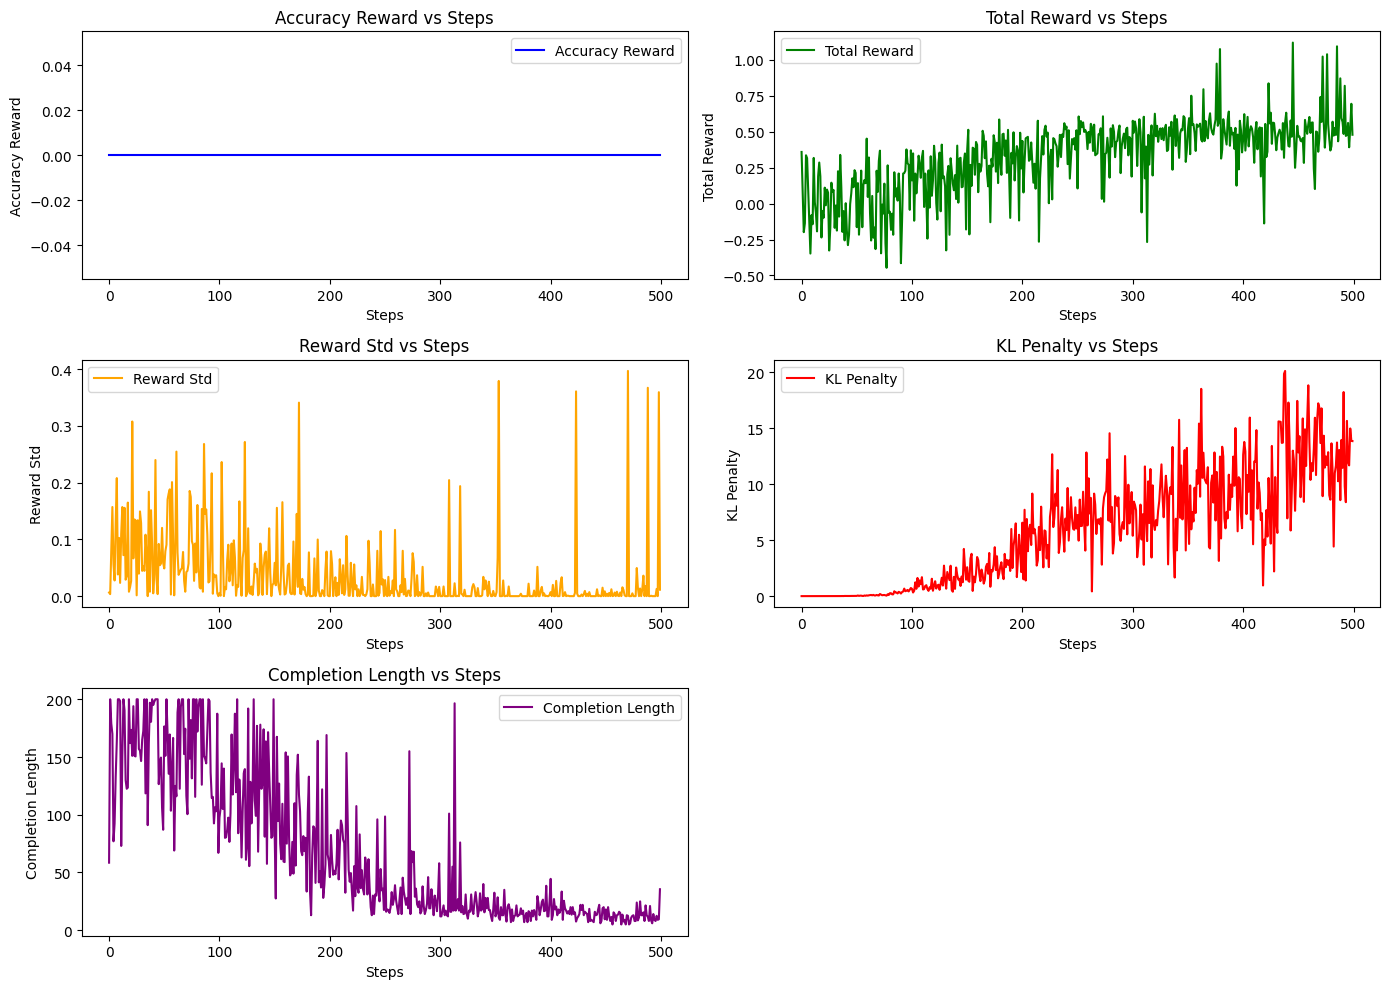

system

Please respond in this specific format ONLY:
<reasoning>
input your reasoning in between these reasoning tags.
</reasoning>
<answer>
input your answer in between these answer tags.
</answer>

user
If there are 12 cookies in a dozen and you have 5 dozen, how many cookies do you have?
assistant
12 cookies


In [4]:
import re
import os
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from collections import defaultdict
from datasets import load_dataset, Dataset
from torch.utils.data import DataLoader
from transformers import AutoTokenizer, AutoModelForCausalLM, get_cosine_schedule_with_warmup

# -------------------------------
# Reasoning Prompt
# -------------------------------
SYSTEM_PROMPT = """
A conversation between User and Assistant. The user asks a question, and the Assistant solves it. The assistant first thinks about the reasoning process in the mind and then provides the user with the answer. The reasoning process and answer are enclosed within <thinking> </thinking> and
<answer> </answer> tags, respectively, i.e., <thinking> reasoning process here </thinking><answer> answer here </answer>.
Response Format rules:
- Always start your response with <thinking> tag and end with </answer>.
- Do not include any text or commentary before the opening <thinking> tag or after the closing </answer> tag.
- Do not include any text or commentary between the closing </thinking> tag and the opening <answer> tag.
For example, your response follow this format:
<thinking>
[Your detailed chain-of-thought goes here]
</thinking>
<answer>
[Your final answer goes here]
</answer>
"""

# -------------------------------
# Helper Functions
# -------------------------------
def get_user_prompt(prompt: str) -> str:
    match = re.search(r"<\|im_start\|>user\s*(.*?)\s*<\|im_end\|>", prompt, re.DOTALL)
    if match:
        return match.group(1).strip()
    lines = prompt.splitlines()
    result = []
    for line in lines:
        if not line.strip().lower().startswith("system"):
            if line.strip().lower().startswith("user"):
                result.append(line.strip()[4:].strip())
            else:
                result.append(line)
    return "\n".join(result).strip()

def get_assistant_response(text: str) -> str:
    match = re.search(r"<\|im_start\|>assistant\s*(.*?)\s*<\|im_end\|>", text, re.DOTALL)
    if match:
        return match.group(1).strip()
    lines = text.splitlines()
    result = []
    capture = False
    for line in lines:
        stripped = line.strip()
        if stripped.lower().startswith("assistant"):
            capture = True
            continue
        if capture:
            result.append(line)
    return "\n".join(result).strip()

def extract_xml_answer(text: str) -> str:
    answer = text.split("<answer>")[-1]
    answer = answer.split("</answer>")[0]
    return answer.strip()

def extract_hash_answer(text: str) -> str:
    if "####" not in text:
        return text.strip()
    return text.split("####", 1)[1].strip()

def count_xml(text: str) -> float:
    count = 0.0
    if text.count("<thinking>\n") == 1:
        count += 0.225
    if text.count("\n</thinking>\n") == 1:
        count += 0.225
    if text.count("\n<answer>\n") == 1:
        count += 0.225
        count -= len(text.split("\n</answer>")[-1]) * 0.001
    if text.count("\n</answer>\n") == 1:
        count += 0.225
        count -= (len(text.split("\n</answer>")[-1]) - 1) * 0.001
    return count

def inference(prompt: str, model_path: str) -> str:
    device = config.device
    model_infer = AutoModelForCausalLM.from_pretrained(model_path).to(device)
    tokenizer_infer = AutoTokenizer.from_pretrained(model_path)
    inputs = tokenizer_infer(prompt, return_tensors="pt", max_length=config.max_prompt_length, truncation=False)
    outputs = model_infer.generate(
        inputs["input_ids"].to(device),
        attention_mask=inputs["attention_mask"].to(device),
        max_new_tokens=config.max_completion_length,
        do_sample=True,
        pad_token_id=tokenizer_infer.eos_token_id,
        temperature=config.temperature,
        num_return_sequences=1,
        use_cache=False
    )
    full_text = tokenizer_infer.decode(outputs[0])
    user_question = get_user_prompt(prompt)
    assistant_response = get_assistant_response(full_text)
    extracted_answer = extract_xml_answer(assistant_response)
    return f"{'='*10} Inference {'='*10}\nQuestion:\n{user_question}\n\nModel Response:\n{assistant_response}\n\nExtracted:\n{extracted_answer}\n{'='*12} End {'='*12}\n"

# -------------------------------
# Reward Functions
# -------------------------------
def reasoning_reward(prompts, completions, answer, **kwargs) -> list:
    rewards = []
    transition_words = ["first", "next", "then", "because", "wait", "aha", "therefore", "finally", "in summary"]
    pattern = r"<\s*thinking\s*>(.*?)<\s*/\s*thinking\s*>"
    for comp in completions:
        match = re.search(pattern, comp, re.DOTALL | re.IGNORECASE)
        if match:
            reasoning_text = match.group(1).strip()
            words = reasoning_text.split()
            reward = 0.0
            # base reward if at least 25 words in between <thinking> </thinking> tags
            if len(words) >= 25:
                reward += 0.25
            lower_text = reasoning_text.lower()
            # transition words reward (case-insensitive)
            transition_count = sum(1 for word in transition_words if word in lower_text)
            if transition_count > 0:
                reward += 0.5
            # bonus reward if there are at least 30 words
            if len(words) >= 50:
                reward += 0.35
            rewards.append(reward)
        else:
            rewards.append(0.0)
    return rewards

def accuracy_reward(prompts, completions, answer, num_generated_samples_to_view=False, q_num=None, **kwargs) -> list:
    q = prompts[0]
    user_question = get_user_prompt(q)
    assistant_responses = [get_assistant_response(r) for r in completions]
    extracted_responses = [extract_xml_answer(get_assistant_response(r)) for r in completions]
    if num_generated_samples_to_view:
        print(f"{'='*15} Sample {q_num} {'='*15}\nQuestion:\n{user_question}\n\nAnswer:\n{answer[0]}\n\nResponse:\n{assistant_responses[0]}\n\nExtracted:\n{extracted_responses[0]}\n{'='*18} End {'='*18}\n")
    return [2.0 if r.strip() == a.strip() else 0.0 for r, a in zip(extracted_responses, answer)]

def soft_format_reward(completions, **kwargs) -> list:
    pattern = r"<thinking>.*?</thinking>\s*<answer>.*?</answer>"
    return [0.5 if re.search(pattern, comp, re.DOTALL) else 0.0 for comp in completions]

def strict_format_reward(completions, **kwargs) -> list:
    pattern = r"^<thinking>\n.*?\n</thinking>\n<answer>\n.*?\n</answer>\n$"
    return [1.0 if re.fullmatch(pattern, comp) else 0.0 for comp in completions]

def xmlcount_reward(prompts, completions, answer, **kwargs) -> list:
    return [count_xml(comp) * 0.5 for comp in completions]

def int_reward(completions, **kwargs) -> list:
    return [0.5 if get_assistant_response(comp).strip().isdigit() else 0.0 for comp in completions]

# -------------------------------
# Custom GRPO Configuration
# -------------------------------
class GRPOConfig:
    def __init__(self, **kwargs):
        self.output_dir = kwargs.get("output_dir", "outputs")
        self.run_name = kwargs.get("run_name", "custom_grpo")
        self.learning_rate = kwargs.get("learning_rate", 1e-5)
        self.weight_decay = kwargs.get("weight_decay", 0.01)
        self.warmup_steps = kwargs.get("warmup_steps", 50)
        self.num_generations = kwargs.get("num_generations", 1)
        self.max_prompt_length = kwargs.get("max_prompt_length", 256)
        self.max_completion_length = kwargs.get("max_completion_length", 256)
        self.num_train_epochs = kwargs.get("num_train_epochs", 1)
        self.gradient_accumulation_steps = kwargs.get("gradient_accumulation_steps", 1)
        self.clip_epsilon = kwargs.get("clip_epsilon", 0.2)
        self.beta = kwargs.get("beta", 0.01)
        self.logging_steps = kwargs.get("logging_steps", 1)
        self.save_steps = kwargs.get("save_steps", 50)
        self.max_steps = kwargs.get("max_steps", 1000)
        self.device = kwargs.get("device", "cuda" if torch.cuda.is_available() else "cpu")
        self.temperature = kwargs.get("temperature", 0.2)
        self.num_generated_samples_to_view = kwargs.get("num_generated_samples_to_view", 10)
        self.bf16 = kwargs.get("bf16", True)
        self.per_device_train_batch_size = kwargs.get("per_device_train_batch_size", 4)
        self.use_flash_attn_2 = kwargs.get("use_flash_attn_2", False)
        self.use_vllm = kwargs.get("use_vllm", False)
        self.vllm_device = kwargs.get("vllm_device", "cuda:0")
        self.vllm_gpu_memory_utilization = kwargs.get("vllm_gpu_memory_utilization", 0.8)
        self.vllm_dtype = kwargs.get("vllm_dtype", "float16")
        self.vllm_max_model_len = kwargs.get("vllm_max_model_len", 512)

# -------------------------------
# Custom GRPO Trainer
# -------------------------------
class GRPOTrainer:
    def __init__(self, model, tokenizer, reward_funcs, config, train_dataset):
        self.dataloader = DataLoader(train_dataset, batch_size=config.per_device_train_batch_size, shuffle=True, collate_fn=lambda x: x)
        self.model = model.to(config.device)
        self.tokenizer = tokenizer
        self.reward_funcs = reward_funcs
        self.config = config
        self.train_dataset = train_dataset

        self.optimizer = torch.optim.AdamW(self.model.parameters(), lr=config.learning_rate, weight_decay=config.weight_decay)
        total_steps = (len(train_dataset) // config.per_device_train_batch_size) * config.num_train_epochs
        self.scheduler = get_cosine_schedule_with_warmup(self.optimizer,
                                                         num_warmup_steps=config.warmup_steps,
                                                         num_training_steps=total_steps)

        self.ref_model = AutoModelForCausalLM.from_pretrained(model.config._name_or_path)
        self.ref_model.to(config.device)
        self.ref_model.eval()
        for param in self.ref_model.parameters():
            param.requires_grad = False

        self.step = 0
        self._metrics = defaultdict(list)
        self.scaler = torch.cuda.amp.GradScaler() if config.device.startswith("cuda") else None

    def get_per_token_logps(self, model, full_ids, attention_mask, num_logits_to_keep):
        outputs = model(input_ids=full_ids, attention_mask=attention_mask)
        logits = outputs.logits[:, :-1, :]  # Exclude the last logit
        logits_slice = logits[:, -num_logits_to_keep:, :]
        token_ids = full_ids[:, -num_logits_to_keep:]
        log_probs = torch.log_softmax(logits_slice, dim=-1)
        token_log_probs = log_probs.gather(dim=-1, index=token_ids.unsqueeze(-1)).squeeze(-1)
        return token_log_probs

    def compute_loss(self, input_ids, generation_output, advantages, old_logps, attention_mask):
        num_logits_to_keep = generation_output.shape[1] - input_ids.shape[1]
        full_ids = generation_output

        # Compute current log probabilities from the updated model
        per_token_logps = self.get_per_token_logps(self.model, full_ids, attention_mask, num_logits_to_keep)
        with torch.no_grad():
            ref_per_token_logps = self.get_per_token_logps(self.ref_model, full_ids, attention_mask, num_logits_to_keep)
        # KL divergence per token (using Schulman et al.'s approximation)
        per_token_kl = torch.exp(ref_per_token_logps - per_token_logps) - (ref_per_token_logps - per_token_logps) - 1

        # Compute mask for valid tokens via EOS detection
        completion_ids = full_ids[:, input_ids.shape[1]:]
        is_eos = (completion_ids == self.tokenizer.eos_token_id)
        batch_size, seq_len = is_eos.size()
        device = input_ids.device
        eos_idx = torch.full((batch_size,), seq_len, dtype=torch.long, device=device)
        for i in range(batch_size):
            nonzero = torch.nonzero(is_eos[i], as_tuple=False)
            if nonzero.numel() > 0:
                eos_idx[i] = nonzero[0, 0]
        sequence_indices = torch.arange(seq_len, device=device).unsqueeze(0).expand(batch_size, -1)
        mask = (sequence_indices <= eos_idx.unsqueeze(1)).float()

        # Calculate policy ratio using stored old log probabilities
        ratio = torch.exp(per_token_logps - old_logps)
        clipped_ratio = torch.clamp(ratio, 1 - self.config.clip_epsilon, 1 + self.config.clip_epsilon)
        # Clipped surrogate objective
        surrogate_loss = -torch.min(ratio * advantages.unsqueeze(1), clipped_ratio * advantages.unsqueeze(1))
        # Add KL penalty term
        per_token_loss = surrogate_loss + self.config.beta * per_token_kl
        loss = ((per_token_loss * mask).sum(dim=1) / (mask.sum(dim=1) + 1e-8)).mean()

        mean_kl = (per_token_kl * mask).sum(dim=1).mean().item()
        completion_length = mask.sum(dim=1).mean().item()
        return loss, mean_kl, completion_length

    def evaluate_rewards(self, prompt, completions, gt_answer):
        rewards_dict = {}
        for func in self.reward_funcs:
            if func.__name__ in ["accuracy_reward", "xmlcount_reward", "reasoning_reward"]:
                r = func([prompt] * len(completions), completions, [gt_answer] * len(completions))
            else:
                r = func(completions)
            rewards_dict[func.__name__] = r
        combined_rewards = [sum(rewards_dict[func_name][i] for func_name in rewards_dict)
                            for i in range(len(completions))]
        return combined_rewards, rewards_dict

    def train(self):
        self.model.train()
        accumulation_counter = 0
        for epoch in range(self.config.num_train_epochs):
            for batch in self.dataloader:
                if self.step >= self.config.max_steps:
                    break

                example = batch[0]
                prompts = example["prompts"]
                gt_answer = example["answer"]
                prompt_text = self.tokenizer.apply_chat_template(prompts, tokenize=False)
                inputs = self.tokenizer(prompt_text, return_tensors="pt", max_length=self.config.max_prompt_length, truncation=False)
                input_ids = inputs.input_ids.to(self.config.device)
                attention_mask = inputs.attention_mask.to(self.config.device)

                with torch.autocast(
                    device_type=self.config.device,
                    enabled=(self.scaler is not None),
                    dtype=(torch.bfloat16 if self.config.bf16 else torch.float16)
                ):
                    generation_output = self.model.generate(
                        input_ids,
                        attention_mask=attention_mask,
                        max_new_tokens=self.config.max_completion_length,
                        do_sample=True,
                        temperature=self.config.temperature,
                        num_return_sequences=self.config.num_generations,
                        pad_token_id=self.tokenizer.eos_token_id,
                        use_cache=False
                    )
                    generation_output = generation_output.to(self.config.device)
                    completions = [self.tokenizer.decode(seq, skip_special_tokens=True) for seq in generation_output]
                    completions = [c.replace(prompt_text, "").strip() if prompt_text in c else c for c in completions]

                    num_gens = len(completions)
                    view_flag = (self.step < self.config.num_generated_samples_to_view)
                    acc_rewards = accuracy_reward([prompt_text]*num_gens, completions, [gt_answer]*num_gens,
                                                   num_generated_samples_to_view=view_flag, q_num=self.step)
                    combined_rewards, reward_dict = self.evaluate_rewards(prompt_text, completions, gt_answer)
                    rewards_tensor = torch.tensor(combined_rewards, device=self.config.device, dtype=torch.float)
                    reward_avg = rewards_tensor.mean().item()
                    reward_std = rewards_tensor.std().item() if rewards_tensor.numel() > 1 else 0.0

                    reasoning_rewards = reward_dict.get("reasoning_reward", [0.0]*len(completions))
                    reasoning_reward_avg = sum(reasoning_rewards) / len(reasoning_rewards)

                    if self.config.num_generations > 1:
                        rewards_grouped = rewards_tensor.view(-1, self.config.num_generations)
                        mean_rewards = rewards_grouped.mean(dim=1)
                        std_rewards = rewards_grouped.std(dim=1) + 1e-4
                        advantages = (rewards_tensor - mean_rewards.repeat_interleave(self.config.num_generations)) / std_rewards.repeat_interleave(self.config.num_generations)
                    else:
                        advantages = rewards_tensor
                    advantages = torch.clamp(advantages, -5.0, 5.0)

                    num_logits_to_keep = generation_output.shape[1] - input_ids.shape[1]
                    old_logps = self.get_per_token_logps(self.model, generation_output, attention_mask, num_logits_to_keep).detach()

                    loss, mean_kl, completion_length = self.compute_loss(input_ids, generation_output, advantages, old_logps, attention_mask)

                loss = loss / self.config.gradient_accumulation_steps
                if self.scaler is not None:
                    self.scaler.scale(loss).backward()
                else:
                    loss.backward()
                accumulation_counter += 1

                if accumulation_counter % self.config.gradient_accumulation_steps == 0:
                    if self.scaler is not None:
                        self.scaler.unscale_(self.optimizer)
                        torch.nn.utils.clip_grad_norm_(self.model.parameters(), 0.1)
                        self.scaler.step(self.optimizer)
                        self.scaler.update()
                    else:
                        torch.nn.utils.clip_grad_norm_(self.model.parameters(), 0.1)
                        self.optimizer.step()
                    self.scheduler.step()
                    self.optimizer.zero_grad()
                    accumulation_counter = 0

                    self._metrics["loss"].append(loss.item() * self.config.gradient_accumulation_steps)
                    self._metrics["completion_length"].append(completion_length)
                    self._metrics["reward"].append(reward_avg)
                    self._metrics["reward_std"].append(reward_std)
                    self._metrics["accuracy_reward"].append(sum(acc_rewards))
                    self._metrics["reasoning_reward"].append(reasoning_reward_avg)
                    self._metrics["kl"].append(mean_kl)

                    # Print without reasoning reward
                    print(f"Step {self.step} | Loss: {loss.item()*self.config.gradient_accumulation_steps:.4f} | Reward: {reward_avg:.4f} | Reward Std: {reward_std:.4f} | Completion Length: {completion_length:.4f} | KL: {mean_kl:.4f}\n")
                    self.step += 1

                    if self.step % self.config.save_steps == 0:
                        checkpoint_path = os.path.join(self.config.output_dir, f"checkpoint-{self.step}")
                        os.makedirs(checkpoint_path, exist_ok=True)
                        self.model.save_pretrained(checkpoint_path)
                        self.tokenizer.save_pretrained(checkpoint_path)
                        print(f"Checkpoint saved to {checkpoint_path}\n")
                        test_messages = [
                            {"role": "system", "content": SYSTEM_PROMPT},
                            {"role": "user", "content": "Which is heavier 1k of steel or 1kg of wool?"}
                        ]
                        test_prompt = self.tokenizer.apply_chat_template(test_messages, tokenize=False)
                        inf_result = inference(test_prompt, checkpoint_path)
                        print(inf_result)
                if self.step >= self.config.max_steps:
                    break
            if self.step >= self.config.max_steps:
                break

        final_model_path = os.path.join(self.config.output_dir, "final_model")
        os.makedirs(final_model_path, exist_ok=True)
        self.model.save_pretrained(final_model_path)
        self.tokenizer.save_pretrained(final_model_path)
        print(f"Final model saved to {final_model_path}")

        plt.figure(figsize=(14, 10))


        plt.subplot(3, 2, 1)
        plt.plot(self._metrics["accuracy_reward"], label="Accuracy", color="blue")
        plt.title("Accuracy vs Steps")
        plt.xlabel("Steps")
        plt.ylabel("Accuracy")
        plt.legend()

        plt.subplot(3, 2, 2)
        plt.plot(self._metrics["reward"], label="Reward", color="green")
        plt.title("Reward vs Steps")
        plt.xlabel("Steps")
        plt.ylabel("Reward")
        plt.legend()

        plt.subplot(3, 2, 3)
        plt.plot(self._metrics["reward_std"], label="Reward Std", color="orange")
        plt.title("Reward Std vs Steps")
        plt.xlabel("Steps")
        plt.ylabel("Reward Std")
        plt.legend()

        plt.subplot(3, 2, 4)
        plt.plot(self._metrics["kl"], label="KL Penalty", color="red")
        plt.title("KL Penalty vs Steps")
        plt.xlabel("Steps")
        plt.ylabel("KL Penalty")
        plt.legend()

        plt.subplot(3, 2, 5)
        plt.plot(self._metrics["completion_length"], label="Avg Completion Length", color="purple")
        plt.title("Avg Completion Length vs Steps")
        plt.xlabel("Steps")
        plt.ylabel("Completion Length")
        plt.legend()

        # plt.subplot(3, 2, 6)
        # plt.plot(self._metrics["reasoning_reward"], label="Reasoning Reward", color="brown")
        # plt.title("Reasoning Reward vs Steps")
        # plt.xlabel("Steps")
        # plt.ylabel("Reasoning Reward")
        # plt.legend()

        plt.tight_layout()
        plt.show()

# -------------------------------
# Get GSM8K & Prep Chat template
# -------------------------------
def get_gsm8k_data(split="train") -> Dataset:
    data = load_dataset('openai/gsm8k', 'main')[split]
    data = data.map(lambda x: {
        'prompts': [
            {'role': 'system', 'content': SYSTEM_PROMPT},
            {'role': 'user', 'content': x['question']}
        ],
        'answer': extract_hash_answer(x['answer'])
    })
    return data

dataset = get_gsm8k_data()

# -------------------------------
# Init Trainer and Config
# -------------------------------
config = GRPOConfig(
    output_dir="outputs/smollm2_135m_grpo_gsm8k",
    run_name="smollm2_135m_grpo_gsm8k_reasoner",
    learning_rate=5e-6,
    weight_decay=0.01,
    warmup_steps=100,
    num_generations=2,
    max_prompt_length=256,
    max_completion_length=200,
    num_train_epochs=1,
    gradient_accumulation_steps=1,
    clip_epsilon=0.2,
    beta=0.01,
    logging_steps=1,
    save_steps=250,
    max_steps=500,
    temperature=0.2,
    num_generated_samples_to_view=250,
    bf16=True,
    per_device_train_batch_size=1,
    # use_flash_attn_2=True,  # 2nable Flash Attention 2 (GPU only)
    # use_vllm=True,  # use vLLM (GPU only)
    # vllm_device="cuda:0",  # vLLM device config (GPU only)
    # vllm_gpu_memory_utilization=0.3  # vLLM GPU memory utilization (GPU only)
)

model_name = "HuggingFaceTB/SmolLM2-135M-Instruct"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    attn_implementation="flash_attention_2" if config.use_flash_attn_2 else None,
    use_cache=False
).to("cuda" if torch.cuda.is_available() else "cpu")
tokenizer.pad_token = tokenizer.eos_token

reward_functions = [reasoning_reward, accuracy_reward, soft_format_reward, strict_format_reward, int_reward, xmlcount_reward]
trainer = GRPOTrainer(model, tokenizer, reward_functions, config, dataset)

# -------------------------------
# Train
# -------------------------------
trainer.train()

# -------------------------------
# Sample from final
# -------------------------------
sample = [
    {"role": "system", "content": SYSTEM_PROMPT},
    {"role": "user", "content": "If there are 12 cookies in a dozen and you have 5 dozen, how many cookies do you have?"}
]
final_prompt = tokenizer.apply_chat_template(sample, tokenize=False)
print(inference(final_prompt, os.path.join(config.output_dir, "final_model")))


### Train SmolLM2-360M-Instruct (coming soon, can also train on 8gb ram, need to close other applications and adjust configs lol)

In [1]:
import re
import os
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from collections import defaultdict
from datasets import load_dataset, Dataset
from torch.utils.data import DataLoader
from transformers import AutoTokenizer, AutoModelForCausalLM, get_cosine_schedule_with_warmup

# -------------------------------
# Reasoning Prompt
# -------------------------------
SYSTEM_PROMPT = """
A conversation between User and Assistant. The user asks a question, and the Assistant solves it. The assistant first thinks about the reasoning process in the mind and then provides the user with the answer. The reasoning process and answer are enclosed within <thinking> </thinking> and
<answer> </answer> tags, respectively, i.e., <thinking> reasoning process here </thinking><answer> answer here </answer>.
Response Format rules:
- Always start your response with <thinking> tag and end with </answer>.
- Do not include any text or commentary before the opening <thinking> tag or after the closing </answer> tag.
- Do not include any text or commentary between the closing </thinking> tag and the opening <answer> tag.
For example, your response follow this format:
<thinking>
[Your detailed chain-of-thought goes here]
</thinking>
<answer>
[Your final answer goes here]
</answer>
"""

# -------------------------------
# Helper Functions
# -------------------------------
def get_user_prompt(prompt: str) -> str:
    match = re.search(r"<\|im_start\|>user\s*(.*?)\s*<\|im_end\|>", prompt, re.DOTALL)
    if match:
        return match.group(1).strip()
    lines = prompt.splitlines()
    result = []
    for line in lines:
        if not line.strip().lower().startswith("system"):
            if line.strip().lower().startswith("user"):
                result.append(line.strip()[4:].strip())
            else:
                result.append(line)
    return "\n".join(result).strip()

def get_assistant_response(text: str) -> str:
    match = re.search(r"<\|im_start\|>assistant\s*(.*?)\s*<\|im_end\|>", text, re.DOTALL)
    if match:
        return match.group(1).strip()
    lines = text.splitlines()
    result = []
    capture = False
    for line in lines:
        stripped = line.strip()
        if stripped.lower().startswith("assistant"):
            capture = True
            continue
        if capture:
            result.append(line)
    return "\n".join(result).strip()

def extract_xml_answer(text: str) -> str:
    answer = text.split("<answer>")[-1]
    answer = answer.split("</answer>")[0]
    return answer.strip()

def extract_hash_answer(text: str) -> str:
    if "####" not in text:
        return text.strip()
    return text.split("####", 1)[1].strip()

def count_xml(text: str) -> float:
    count = 0.0
    if text.count("<thinking>\n") == 1:
        count += 0.225
    if text.count("\n</thinking>\n") == 1:
        count += 0.225
    if text.count("\n<answer>\n") == 1:
        count += 0.225
        count -= len(text.split("\n</answer>")[-1]) * 0.001
    if text.count("\n</answer>\n") == 1:
        count += 0.225
        count -= (len(text.split("\n</answer>")[-1]) - 1) * 0.001
    return count

def inference(prompt: str, model_path: str) -> str:
    device = config.device
    model_infer = AutoModelForCausalLM.from_pretrained(model_path).to(device)
    tokenizer_infer = AutoTokenizer.from_pretrained(model_path)
    inputs = tokenizer_infer(prompt, return_tensors="pt", max_length=config.max_prompt_length, truncation=False)
    outputs = model_infer.generate(
        inputs["input_ids"].to(device),
        attention_mask=inputs["attention_mask"].to(device),
        max_new_tokens=config.max_completion_length,
        do_sample=True,
        pad_token_id=tokenizer_infer.eos_token_id,
        temperature=config.temperature,
        num_return_sequences=1,
        use_cache=False
    )
    full_text = tokenizer_infer.decode(outputs[0])
    user_question = get_user_prompt(prompt)
    assistant_response = get_assistant_response(full_text)
    extracted_answer = extract_xml_answer(assistant_response)
    return f"{'='*10} Inference {'='*10}\nQuestion:\n{user_question}\n\nModel Response:\n{assistant_response}\n\nExtracted:\n{extracted_answer}\n{'='*12} End {'='*12}\n"

# -------------------------------
# Reward Functions
# -------------------------------
def reasoning_reward(prompts, completions, answer, **kwargs) -> list:
    rewards = []
    transition_words = ["first", "next", "then", "because", "wait", "aha", "therefore", "finally", "in summary"]
    pattern = r"<\s*thinking\s*>(.*?)<\s*/\s*thinking\s*>"
    for comp in completions:
        match = re.search(pattern, comp, re.DOTALL | re.IGNORECASE)
        if match:
            reasoning_text = match.group(1).strip()
            words = reasoning_text.split()
            reward = 0.0
            # base reward if at least 25 words in between <thinking> </thinking> tags
            if len(words) >= 25:
                reward += 0.25
            lower_text = reasoning_text.lower()
            # transition words reward (case-insensitive)
            transition_count = sum(1 for word in transition_words if word in lower_text)
            if transition_count > 0:
                reward += 0.5
            # bonus reward if there are at least 30 words
            if len(words) >= 50:
                reward += 0.35
            rewards.append(reward)
        else:
            rewards.append(0.0)
    return rewards

def accuracy_reward(prompts, completions, answer, num_generated_samples_to_view=False, q_num=None, **kwargs) -> list:
    q = prompts[0]
    user_question = get_user_prompt(q)
    assistant_responses = [get_assistant_response(r) for r in completions]
    extracted_responses = [extract_xml_answer(get_assistant_response(r)) for r in completions]
    if num_generated_samples_to_view:
        print(f"{'='*15} Sample {q_num} {'='*15}\nQuestion:\n{user_question}\n\nAnswer:\n{answer[0]}\n\nResponse:\n{assistant_responses[0]}\n\nExtracted:\n{extracted_responses[0]}\n{'='*18} End {'='*18}\n")
    return [2.0 if r.strip() == a.strip() else 0.0 for r, a in zip(extracted_responses, answer)]

def soft_format_reward(completions, **kwargs) -> list:
    pattern = r"<thinking>.*?</thinking>\s*<answer>.*?</answer>"
    return [0.5 if re.search(pattern, comp, re.DOTALL) else 0.0 for comp in completions]

def strict_format_reward(completions, **kwargs) -> list:
    pattern = r"^<thinking>\n.*?\n</thinking>\n<answer>\n.*?\n</answer>\n$"
    return [1.0 if re.fullmatch(pattern, comp) else 0.0 for comp in completions]

def xmlcount_reward(prompts, completions, answer, **kwargs) -> list:
    return [count_xml(comp) * 0.5 for comp in completions]

def int_reward(completions, **kwargs) -> list:
    return [0.5 if get_assistant_response(comp).strip().isdigit() else 0.0 for comp in completions]

# -------------------------------
# Custom GRPO Configuration
# -------------------------------
class GRPOConfig:
    def __init__(self, **kwargs):
        self.output_dir = kwargs.get("output_dir", "outputs")
        self.run_name = kwargs.get("run_name", "custom_grpo")
        self.learning_rate = kwargs.get("learning_rate", 1e-5)
        self.weight_decay = kwargs.get("weight_decay", 0.01)
        self.warmup_steps = kwargs.get("warmup_steps", 50)
        self.num_generations = kwargs.get("num_generations", 1)
        self.max_prompt_length = kwargs.get("max_prompt_length", 256)
        self.max_completion_length = kwargs.get("max_completion_length", 256)
        self.num_train_epochs = kwargs.get("num_train_epochs", 1)
        self.gradient_accumulation_steps = kwargs.get("gradient_accumulation_steps", 1)
        self.clip_epsilon = kwargs.get("clip_epsilon", 0.2)
        self.beta = kwargs.get("beta", 0.01)
        self.logging_steps = kwargs.get("logging_steps", 1)
        self.save_steps = kwargs.get("save_steps", 50)
        self.max_steps = kwargs.get("max_steps", 1000)
        self.device = kwargs.get("device", "cuda" if torch.cuda.is_available() else "cpu")
        self.temperature = kwargs.get("temperature", 0.2)
        self.num_generated_samples_to_view = kwargs.get("num_generated_samples_to_view", 10)
        self.bf16 = kwargs.get("bf16", True)
        self.per_device_train_batch_size = kwargs.get("per_device_train_batch_size", 4)
        self.use_flash_attn_2 = kwargs.get("use_flash_attn_2", False)
        self.use_vllm = kwargs.get("use_vllm", False)
        self.vllm_device = kwargs.get("vllm_device", "cuda:0")
        self.vllm_gpu_memory_utilization = kwargs.get("vllm_gpu_memory_utilization", 0.8)
        self.vllm_dtype = kwargs.get("vllm_dtype", "float16")
        self.vllm_max_model_len = kwargs.get("vllm_max_model_len", 512)

# -------------------------------
# Custom GRPO Trainer
# -------------------------------
class GRPOTrainer:
    def __init__(self, model, tokenizer, reward_funcs, config, train_dataset):
        self.dataloader = DataLoader(train_dataset, batch_size=config.per_device_train_batch_size, shuffle=True, collate_fn=lambda x: x)
        self.model = model.to(config.device)
        self.tokenizer = tokenizer
        self.reward_funcs = reward_funcs
        self.config = config
        self.train_dataset = train_dataset

        self.optimizer = torch.optim.AdamW(self.model.parameters(), lr=config.learning_rate, weight_decay=config.weight_decay)
        total_steps = (len(train_dataset) // config.per_device_train_batch_size) * config.num_train_epochs
        self.scheduler = get_cosine_schedule_with_warmup(self.optimizer,
                                                         num_warmup_steps=config.warmup_steps,
                                                         num_training_steps=total_steps)

        self.ref_model = AutoModelForCausalLM.from_pretrained(model.config._name_or_path)
        self.ref_model.to(config.device)
        self.ref_model.eval()
        for param in self.ref_model.parameters():
            param.requires_grad = False

        self.step = 0
        self._metrics = defaultdict(list)
        self.scaler = torch.cuda.amp.GradScaler() if config.device.startswith("cuda") else None

    def get_per_token_logps(self, model, full_ids, attention_mask, num_logits_to_keep):
        outputs = model(input_ids=full_ids, attention_mask=attention_mask)
        logits = outputs.logits[:, :-1, :]  # Exclude the last logit
        logits_slice = logits[:, -num_logits_to_keep:, :]
        token_ids = full_ids[:, -num_logits_to_keep:]
        log_probs = torch.log_softmax(logits_slice, dim=-1)
        token_log_probs = log_probs.gather(dim=-1, index=token_ids.unsqueeze(-1)).squeeze(-1)
        return token_log_probs

    def compute_loss(self, input_ids, generation_output, advantages, old_logps, attention_mask):
        num_logits_to_keep = generation_output.shape[1] - input_ids.shape[1]
        full_ids = generation_output

        # Compute current log probabilities from the updated model
        per_token_logps = self.get_per_token_logps(self.model, full_ids, attention_mask, num_logits_to_keep)
        with torch.no_grad():
            ref_per_token_logps = self.get_per_token_logps(self.ref_model, full_ids, attention_mask, num_logits_to_keep)
        # KL divergence per token (using Schulman et al.'s approximation)
        per_token_kl = torch.exp(ref_per_token_logps - per_token_logps) - (ref_per_token_logps - per_token_logps) - 1

        # Compute mask for valid tokens via EOS detection
        completion_ids = full_ids[:, input_ids.shape[1]:]
        is_eos = (completion_ids == self.tokenizer.eos_token_id)
        batch_size, seq_len = is_eos.size()
        device = input_ids.device
        eos_idx = torch.full((batch_size,), seq_len, dtype=torch.long, device=device)
        for i in range(batch_size):
            nonzero = torch.nonzero(is_eos[i], as_tuple=False)
            if nonzero.numel() > 0:
                eos_idx[i] = nonzero[0, 0]
        sequence_indices = torch.arange(seq_len, device=device).unsqueeze(0).expand(batch_size, -1)
        mask = (sequence_indices <= eos_idx.unsqueeze(1)).float()

        # Calculate policy ratio using stored old log probabilities
        ratio = torch.exp(per_token_logps - old_logps)
        clipped_ratio = torch.clamp(ratio, 1 - self.config.clip_epsilon, 1 + self.config.clip_epsilon)
        # Clipped surrogate objective
        surrogate_loss = -torch.min(ratio * advantages.unsqueeze(1), clipped_ratio * advantages.unsqueeze(1))
        # Add KL penalty term
        per_token_loss = surrogate_loss + self.config.beta * per_token_kl
        loss = ((per_token_loss * mask).sum(dim=1) / (mask.sum(dim=1) + 1e-8)).mean()

        mean_kl = (per_token_kl * mask).sum(dim=1).mean().item()
        completion_length = mask.sum(dim=1).mean().item()
        return loss, mean_kl, completion_length

    def evaluate_rewards(self, prompt, completions, gt_answer):
        rewards_dict = {}
        for func in self.reward_funcs:
            if func.__name__ in ["accuracy_reward", "xmlcount_reward", "reasoning_reward"]:
                r = func([prompt] * len(completions), completions, [gt_answer] * len(completions))
            else:
                r = func(completions)
            rewards_dict[func.__name__] = r
        combined_rewards = [sum(rewards_dict[func_name][i] for func_name in rewards_dict)
                            for i in range(len(completions))]
        return combined_rewards, rewards_dict

    def train(self):
        self.model.train()
        accumulation_counter = 0
        for epoch in range(self.config.num_train_epochs):
            for batch in self.dataloader:
                if self.step >= self.config.max_steps:
                    break

                example = batch[0]
                prompts = example["prompts"]
                gt_answer = example["answer"]
                prompt_text = self.tokenizer.apply_chat_template(prompts, tokenize=False)
                inputs = self.tokenizer(prompt_text, return_tensors="pt", max_length=self.config.max_prompt_length, truncation=False)
                input_ids = inputs.input_ids.to(self.config.device)
                attention_mask = inputs.attention_mask.to(self.config.device)

                with torch.autocast(
                    device_type=self.config.device,
                    enabled=(self.scaler is not None),
                    dtype=(torch.bfloat16 if self.config.bf16 else torch.float16)
                ):
                    generation_output = self.model.generate(
                        input_ids,
                        attention_mask=attention_mask,
                        max_new_tokens=self.config.max_completion_length,
                        do_sample=True,
                        temperature=self.config.temperature,
                        num_return_sequences=self.config.num_generations,
                        pad_token_id=self.tokenizer.eos_token_id,
                        use_cache=False
                    )
                    generation_output = generation_output.to(self.config.device)
                    completions = [self.tokenizer.decode(seq, skip_special_tokens=True) for seq in generation_output]
                    completions = [c.replace(prompt_text, "").strip() if prompt_text in c else c for c in completions]

                    num_gens = len(completions)
                    view_flag = (self.step < self.config.num_generated_samples_to_view)
                    acc_rewards = accuracy_reward([prompt_text]*num_gens, completions, [gt_answer]*num_gens,
                                                   num_generated_samples_to_view=view_flag, q_num=self.step)
                    combined_rewards, reward_dict = self.evaluate_rewards(prompt_text, completions, gt_answer)
                    rewards_tensor = torch.tensor(combined_rewards, device=self.config.device, dtype=torch.float)
                    reward_avg = rewards_tensor.mean().item()
                    reward_std = rewards_tensor.std().item() if rewards_tensor.numel() > 1 else 0.0

                    reasoning_rewards = reward_dict.get("reasoning_reward", [0.0]*len(completions))
                    reasoning_reward_avg = sum(reasoning_rewards) / len(reasoning_rewards)

                    if self.config.num_generations > 1:
                        rewards_grouped = rewards_tensor.view(-1, self.config.num_generations)
                        mean_rewards = rewards_grouped.mean(dim=1)
                        std_rewards = rewards_grouped.std(dim=1) + 1e-4
                        advantages = (rewards_tensor - mean_rewards.repeat_interleave(self.config.num_generations)) / std_rewards.repeat_interleave(self.config.num_generations)
                    else:
                        advantages = rewards_tensor
                    advantages = torch.clamp(advantages, -5.0, 5.0)

                    num_logits_to_keep = generation_output.shape[1] - input_ids.shape[1]
                    old_logps = self.get_per_token_logps(self.model, generation_output, attention_mask, num_logits_to_keep).detach()

                    loss, mean_kl, completion_length = self.compute_loss(input_ids, generation_output, advantages, old_logps, attention_mask)

                loss = loss / self.config.gradient_accumulation_steps
                if self.scaler is not None:
                    self.scaler.scale(loss).backward()
                else:
                    loss.backward()
                accumulation_counter += 1

                if accumulation_counter % self.config.gradient_accumulation_steps == 0:
                    if self.scaler is not None:
                        self.scaler.unscale_(self.optimizer)
                        torch.nn.utils.clip_grad_norm_(self.model.parameters(), 0.1)
                        self.scaler.step(self.optimizer)
                        self.scaler.update()
                    else:
                        torch.nn.utils.clip_grad_norm_(self.model.parameters(), 0.1)
                        self.optimizer.step()
                    self.scheduler.step()
                    self.optimizer.zero_grad()
                    accumulation_counter = 0

                    self._metrics["loss"].append(loss.item() * self.config.gradient_accumulation_steps)
                    self._metrics["completion_length"].append(completion_length)
                    self._metrics["reward"].append(reward_avg)
                    self._metrics["reward_std"].append(reward_std)
                    self._metrics["accuracy_reward"].append(sum(acc_rewards))
                    self._metrics["reasoning_reward"].append(reasoning_reward_avg)
                    self._metrics["kl"].append(mean_kl)

                    # Print without reasoning reward
                    print(f"Step {self.step} | Loss: {loss.item()*self.config.gradient_accumulation_steps:.4f} | Reward: {reward_avg:.4f} | Reward Std: {reward_std:.4f} | Completion Length: {completion_length:.4f} | KL: {mean_kl:.4f}\n")
                    self.step += 1

                    if self.step % self.config.save_steps == 0:
                        checkpoint_path = os.path.join(self.config.output_dir, f"checkpoint-{self.step}")
                        os.makedirs(checkpoint_path, exist_ok=True)
                        self.model.save_pretrained(checkpoint_path)
                        self.tokenizer.save_pretrained(checkpoint_path)
                        print(f"Checkpoint saved to {checkpoint_path}\n")
                        test_messages = [
                            {"role": "system", "content": SYSTEM_PROMPT},
                            {"role": "user", "content": "Which is heavier 1k of steel or 1kg of wool?"}
                        ]
                        test_prompt = self.tokenizer.apply_chat_template(test_messages, tokenize=False)
                        inf_result = inference(test_prompt, checkpoint_path)
                        print(inf_result)
                if self.step >= self.config.max_steps:
                    break
            if self.step >= self.config.max_steps:
                break

        final_model_path = os.path.join(self.config.output_dir, "final_model")
        os.makedirs(final_model_path, exist_ok=True)
        self.model.save_pretrained(final_model_path)
        self.tokenizer.save_pretrained(final_model_path)
        print(f"Final model saved to {final_model_path}")

        plt.figure(figsize=(14, 10))


        plt.subplot(3, 2, 1)
        plt.plot(self._metrics["accuracy_reward"], label="Accuracy", color="blue")
        plt.title("Accuracy vs Steps")
        plt.xlabel("Steps")
        plt.ylabel("Accuracy")
        plt.legend()

        plt.subplot(3, 2, 2)
        plt.plot(self._metrics["reward"], label="Reward", color="green")
        plt.title("Reward vs Steps")
        plt.xlabel("Steps")
        plt.ylabel("Reward")
        plt.legend()

        plt.subplot(3, 2, 3)
        plt.plot(self._metrics["reward_std"], label="Reward Std", color="orange")
        plt.title("Reward Std vs Steps")
        plt.xlabel("Steps")
        plt.ylabel("Reward Std")
        plt.legend()

        plt.subplot(3, 2, 4)
        plt.plot(self._metrics["kl"], label="KL Penalty", color="red")
        plt.title("KL Penalty vs Steps")
        plt.xlabel("Steps")
        plt.ylabel("KL Penalty")
        plt.legend()

        plt.subplot(3, 2, 5)
        plt.plot(self._metrics["completion_length"], label="Avg Completion Length", color="purple")
        plt.title("Avg Completion Length vs Steps")
        plt.xlabel("Steps")
        plt.ylabel("Completion Length")
        plt.legend()

        # plt.subplot(3, 2, 6)
        # plt.plot(self._metrics["reasoning_reward"], label="Reasoning Reward", color="brown")
        # plt.title("Reasoning Reward vs Steps")
        # plt.xlabel("Steps")
        # plt.ylabel("Reasoning Reward")
        # plt.legend()

        plt.tight_layout()
        plt.show()

# -------------------------------
# Get GSM8K & Prep Chat template
# -------------------------------
def get_gsm8k_data(split="train") -> Dataset:
    data = load_dataset('openai/gsm8k', 'main')[split]
    data = data.map(lambda x: {
        'prompts': [
            {'role': 'system', 'content': SYSTEM_PROMPT},
            {'role': 'user', 'content': x['question']}
        ],
        'answer': extract_hash_answer(x['answer'])
    })
    return data

dataset = get_gsm8k_data()

# -------------------------------
# Init Trainer and Config
# -------------------------------
config = GRPOConfig(
    output_dir="outputs/smollm2_360m_grpo_gsm8k",
    run_name="smollm2_360m_grpo_gsm8k_reasoner",
    learning_rate=5e-6,
    weight_decay=0.01,
    warmup_steps=100,
    num_generations=2,
    max_prompt_length=256,
    max_completion_length=200,
    num_train_epochs=1,
    gradient_accumulation_steps=1,
    clip_epsilon=0.2,
    beta=0.01,
    logging_steps=1,
    save_steps=10,
    max_steps=10,
    temperature=0.2,
    num_generated_samples_to_view=10,
    bf16=True,
    per_device_train_batch_size=1,
    # use_flash_attn_2=True,  # 2nable Flash Attention 2 (GPU only)
    # use_vllm=True,  # use vLLM (GPU only)
    # vllm_device="cuda:0",  # vLLM device config (GPU only)
    # vllm_gpu_memory_utilization=0.3  # vLLM GPU memory utilization (GPU only)
)

model_name = "HuggingFaceTB/SmolLM2-360M-Instruct"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    attn_implementation="flash_attention_2" if config.use_flash_attn_2 else None,
    use_cache=False
).to("cuda" if torch.cuda.is_available() else "cpu")
tokenizer.pad_token = tokenizer.eos_token

reward_functions = [reasoning_reward, accuracy_reward, soft_format_reward, strict_format_reward, int_reward, xmlcount_reward]
trainer = GRPOTrainer(model, tokenizer, reward_functions, config, dataset)

# -------------------------------
# Train
# -------------------------------
trainer.train()

# -------------------------------
# Sample from final
# -------------------------------
sample = [
    {"role": "system", "content": SYSTEM_PROMPT},
    {"role": "user", "content": "If there are 12 cookies in a dozen and you have 5 dozen, how many cookies do you have?"}
]
final_prompt = tokenizer.apply_chat_template(sample, tokenize=False)
print(inference(final_prompt, os.path.join(config.output_dir, "final_model")))

=============== Sample 0 ===============
Question:
Carl has a jar full of marbles. He takes out 12 marbles to play a game with, but he accidentally drops them and 1/2 the marbles get lost. So Carl takes out 10 more marbles. While he is playing his game his mother comes home with another bag of marbles for him, which has 25 marbles in it. If Carl can't find his lost marbles, then how many marbles is he going to put in the jar after he plays his game, from both his original marbles and the new ones?

Answer:
41

Response:
To find out how many marbles Carl will put in the jar after he plays his game, we need to calculate the total number of marbles he initially had and the number of marbles he lost.

Initially, Carl had 12 marbles in the jar.

After dropping 12 marbles, Carl lost 1/2 of them, which is 12/2 = 6 marbles.

So, Carl lost 6 marbles.

After taking out 10 more marbles, Carl has a total of 12 (initial marbles) + 10 (new marbles) = 22 marbles.

Carl will put 22 marbles in the jar 

KeyboardInterrupt: 